In [90]:
from lib import Augmentation_methods
from lib import data_preparation

In [91]:
# All used imports
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

from lib import Augmentation_methods

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from IPython.display import clear_output

from scipy.signal import stft

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from pathlib import Path
import datetime
import glob as gl

## Real Data [206 B5]

In [92]:
df_real_data = data_preparation.load_real_data(room="206 B5",year=2022, month=10, day=14, startHour=18,lastHour=18)
df_real_data

5691390 rows from filepath: 2022-10-14_18-00-00


,z,time
0,-32,2022-10-14 18:00:00.000000
1,-32,2022-10-14 18:00:00.000625
2,-32,2022-10-14 18:00:00.001250
3,-32,2022-10-14 18:00:00.001875
4,-32,2022-10-14 18:00:00.002500
...,...,...
5691385,1020,2022-10-14 18:59:17.115625
5691386,1018,2022-10-14 18:59:17.116250
5691387,1018,2022-10-14 18:59:17.116875
5691388,1016,2022-10-14 18:59:17.117500


In [93]:
df_segmented = data_preparation.shifting_window_segmentation(df_real_data,stepsize= 5)
df_segmented

,left_t,right_t,z,features
0,2022-10-14 18:00:00,2022-10-14 18:00:10,"[-32, -32, -32, -32, -32, -32, -32, 1018, 1016...","[[1103660.6865753164, 2.0950753164061866, 485...."
1,2022-10-14 18:00:05,2022-10-14 18:00:15,"[1018, 1020, 1019, 1020, 1020, 1022, 1020, 101...","[[49.19619600000014, 1.0281960000000203, 2.876..."
2,2022-10-14 18:00:10,2022-10-14 18:00:20,"[1018, 1020, 1022, 1019, 1020, 1022, 1016, 102...","[[1104439.4146597658, 1.1596597656249412, 71.9..."
3,2022-10-14 18:00:15,2022-10-14 18:00:25,"[1016, 1018, 1019, 1016, 1020, 1017, 1021, 102...","[[2384055.275491891, 1.078741890625051, 462.74..."
4,2022-10-14 18:00:20,2022-10-14 18:00:30,"[1016, 1018, 1018, 1018, 1020, 1019, 1016, 101...","[[2384469.4818425626, 1.3753425624998847, 978...."
...,...,...,...,...
705,2022-10-14 18:58:45,2022-10-14 18:58:55,"[1018, 1017, 1020, 1020, 1018, 1017, 1021, 102...","[[51.65656256249927, 1.409562562499879, 3.0019..."
706,2022-10-14 18:58:50,2022-10-14 18:59:00,"[1018, 1020, 1018, 1018, 1020, 1020, 1020, 101...","[[1658359.4605006287, 1.5053756289061584, 106...."
707,2022-10-14 18:58:55,2022-10-14 18:59:05,"[1018, 1018, 1018, 1018, 1018, 1020, 1018, 102...","[[1658385.8599534726, 1.4803284726563342, 106...."
708,2022-10-14 18:59:00,2022-10-14 18:59:10,"[1018, 1018, 1020, 1018, 1020, 1020, 1020, 102...","[[50.72110351562565, 1.258603515625102, 3.0003..."


In [94]:
df_segmented_real= df_segmented[(df_segmented['left_t'] >= '2022-10-14 18:43:00') & (df_segmented['right_t'] <= '2022-10-14 18:46:00')]

In [95]:
df_segmented_real

,left_t,right_t,z,features
516,2022-10-14 18:43:00,2022-10-14 18:43:10,"[1018, 1018, 1022, 1018, 1016, 1020, 1018, 102...","[[22331714.168263596, 5.54926359765646, 3432.3..."
517,2022-10-14 18:43:05,2022-10-14 18:43:15,"[1020, 1018, 1017, 1020, 1022, 1020, 1022, 101...","[[22332570.69950813, 5.1305081289062455, 2571...."
518,2022-10-14 18:43:10,2022-10-14 18:43:20,"[1018, 1022, 1020, 1020, 1020, 1020, 1018, 102...","[[50.54232422265607, 1.2305742226562217, 2.963..."
519,2022-10-14 18:43:15,2022-10-14 18:43:25,"[1020, 1020, 1018, 1018, 1020, 1018, 1018, 101...","[[50.85561797265676, 1.2798679726563302, 3.090..."
520,2022-10-14 18:43:20,2022-10-14 18:43:30,"[1022, 1022, 1018, 1022, 1020, 1016, 1020, 102...","[[2383767.7069702502, 1.1119702499999193, 359...."
521,2022-10-14 18:43:25,2022-10-14 18:43:35,"[1020, 1020, 1022, 1016, 1018, 1016, 1020, 102...","[[2383722.1607955624, 1.1432955625000234, 359...."
522,2022-10-14 18:43:30,2022-10-14 18:43:40,"[1019, 1018, 1020, 1020, 1020, 1022, 1018, 101...","[[52.07336203515692, 1.479112035156363, 2.9043..."
523,2022-10-14 18:43:35,2022-10-14 18:43:45,"[1020, 1018, 1020, 1020, 1022, 1024, 1020, 102...","[[52.079676390625316, 1.4801763906250531, 2.95..."
524,2022-10-14 18:43:40,2022-10-14 18:43:50,"[1020, 1020, 1018, 1018, 1018, 1016, 1018, 101...","[[52.011141015624474, 1.468641015624912, 2.946..."
525,2022-10-14 18:43:45,2022-10-14 18:43:55,"[1022, 1020, 1016, 1020, 1020, 1018, 1020, 101...","[[50.89217251562484, 1.2856725156249753, 2.951..."


In [96]:
Real_Events = []
for i in range(len(df_segmented_real)):
    Real_Events.append(df_segmented_real["features"].iloc[i].flatten())

In [97]:
Real_Events

[array([2.23317142e+07, 5.54926360e+00, 3.43234455e+03, 1.26513598e-01,
        5.54926360e+00]),
 array([2.23325707e+07, 5.13050813e+00, 2.57152868e+03, 7.02581289e-02,
        5.13050813e+00]),
 array([50.54232422,  1.23057422,  2.96336328,  0.79332422,  3.57469922]),
 array([50.85561797,  1.27986797,  3.09081953,  0.75461797,  3.49199297]),
 array([2.38376771e+06, 1.11197025e+00, 3.59186905e+02, 8.93970250e-01,
        3.78497025e+00]),
 array([2.38372216e+06, 1.14329556e+00, 3.59048954e+02, 8.66295562e-01,
        3.72779556e+00]),
 array([52.07336204,  1.47911204,  2.90432546,  0.61436204,  3.18198704]),
 array([52.07967639,  1.48017639,  2.95219861,  0.61367639,  3.18042639]),
 array([52.01114102,  1.46864102,  2.94648398,  0.62114102,  3.19739102]),
 array([50.89217252,  1.28567252,  2.95145248,  0.75017252,  3.48242252]),
 array([227.11808644,   1.14583644,   3.76797606,   0.86408644,
          4.28671144]),
 array([2.38339486e+06, 1.38121256e+00, 1.54338662e+02, 6.80212562e-01

# 1. Logistische Regression

### Load all fake events

In [98]:
fake_data,All_Events,All_Labels = data_preparation.fake_lab_data()

/home/ing2146/Final/SNEHA/lib/data_preparation.py:202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  All_Events_Data = np.array(All_Events_Data)[shuffler]
/home/ing2146/Final/SNEHA/lib/data_preparation.py:226: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_fake_dummy_Data = np.array(df_fake_dummy_Data)


In [99]:
All_Events

array([[5.07104213e+01, 1.25692127e+00, 3.04945373e+00, 7.72421266e-01,
        1.25692127e+00],
       [6.04554845e+01, 3.15173447e+00, 3.91545303e+00, 5.04844727e-02,
        4.94923447e+00],
       [5.11233938e+01, 1.32264375e+00, 3.11641875e+00, 7.22393754e-01,
        1.32264375e+00],
       ...,
       [5.01387908e+01, 1.16829077e+00, 3.06783423e+00, 8.44790766e-01,
        1.16829077e+00],
       [4.96196970e+01, 1.09019702e+00, 3.14767798e+00, 9.13697016e-01,
        1.09019702e+00],
       [5.18859102e+01, 1.44766016e+00, 3.13277734e+00, 6.34910160e-01,
        1.44766016e+00]])

In [100]:
x = All_Events
y = All_Labels

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.2)
lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
pd.crosstab(lr.predict(x_test), y_test)

col_0,0,1
row_0,,
0,3978,0
1,0,238


In [121]:
prediction = lr.predict(Real_Events)

In [122]:
len(df_segmented_real[df_segmented_real.predicted==1])

15

In [123]:
len(df_segmented_real[df_segmented_real.predicted==0])

20

In [103]:
df_segmented_real["predicted"] = prediction

/tmp/ipykernel_2018982/2741667025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmented_real["predicted"] = prediction


In [104]:
df_segmented_real

,left_t,right_t,z,features,predicted
516,2022-10-14 18:43:00,2022-10-14 18:43:10,"[1018, 1018, 1022, 1018, 1016, 1020, 1018, 102...","[[22331714.168263596, 5.54926359765646, 3432.3...",1
517,2022-10-14 18:43:05,2022-10-14 18:43:15,"[1020, 1018, 1017, 1020, 1022, 1020, 1022, 101...","[[22332570.69950813, 5.1305081289062455, 2571....",1
518,2022-10-14 18:43:10,2022-10-14 18:43:20,"[1018, 1022, 1020, 1020, 1020, 1020, 1018, 102...","[[50.54232422265607, 1.2305742226562217, 2.963...",0
519,2022-10-14 18:43:15,2022-10-14 18:43:25,"[1020, 1020, 1018, 1018, 1020, 1018, 1018, 101...","[[50.85561797265676, 1.2798679726563302, 3.090...",0
520,2022-10-14 18:43:20,2022-10-14 18:43:30,"[1022, 1022, 1018, 1022, 1020, 1016, 1020, 102...","[[2383767.7069702502, 1.1119702499999193, 359....",1
521,2022-10-14 18:43:25,2022-10-14 18:43:35,"[1020, 1020, 1022, 1016, 1018, 1016, 1020, 102...","[[2383722.1607955624, 1.1432955625000234, 359....",1
522,2022-10-14 18:43:30,2022-10-14 18:43:40,"[1019, 1018, 1020, 1020, 1020, 1022, 1018, 101...","[[52.07336203515692, 1.479112035156363, 2.9043...",0
523,2022-10-14 18:43:35,2022-10-14 18:43:45,"[1020, 1018, 1020, 1020, 1022, 1024, 1020, 102...","[[52.079676390625316, 1.4801763906250531, 2.95...",0
524,2022-10-14 18:43:40,2022-10-14 18:43:50,"[1020, 1020, 1018, 1018, 1018, 1016, 1018, 101...","[[52.011141015624474, 1.468641015624912, 2.946...",0
525,2022-10-14 18:43:45,2022-10-14 18:43:55,"[1022, 1020, 1016, 1020, 1020, 1018, 1020, 101...","[[50.89217251562484, 1.2856725156249753, 2.951...",0


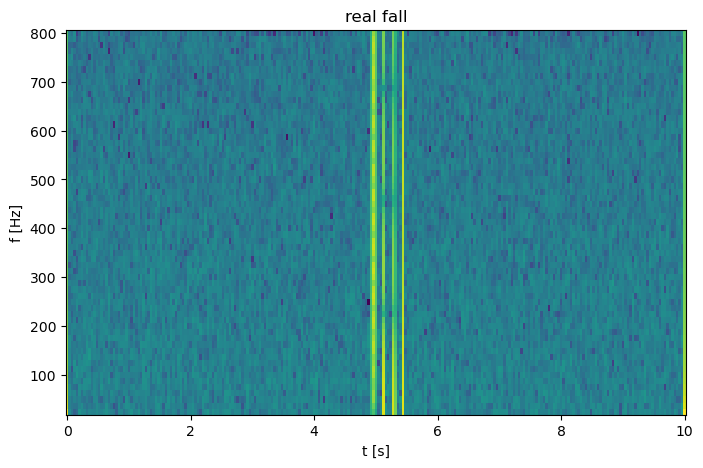

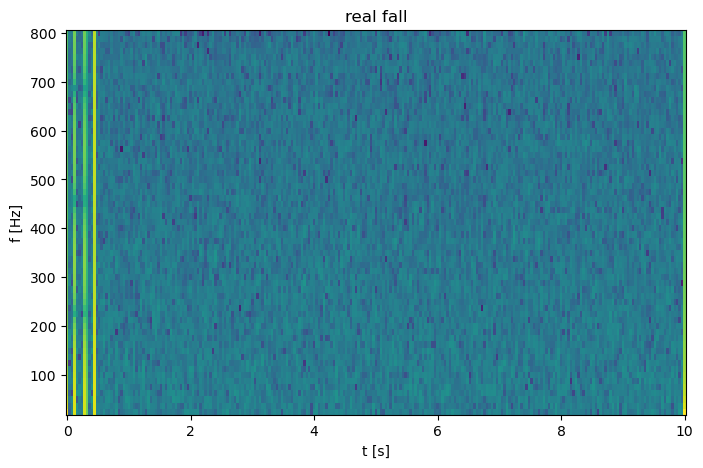

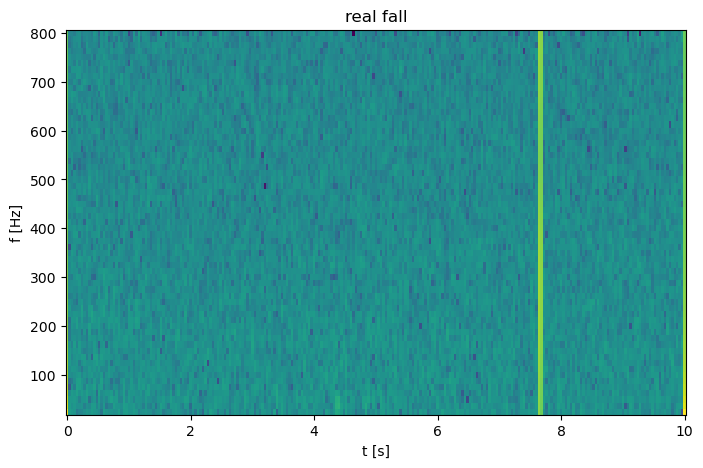

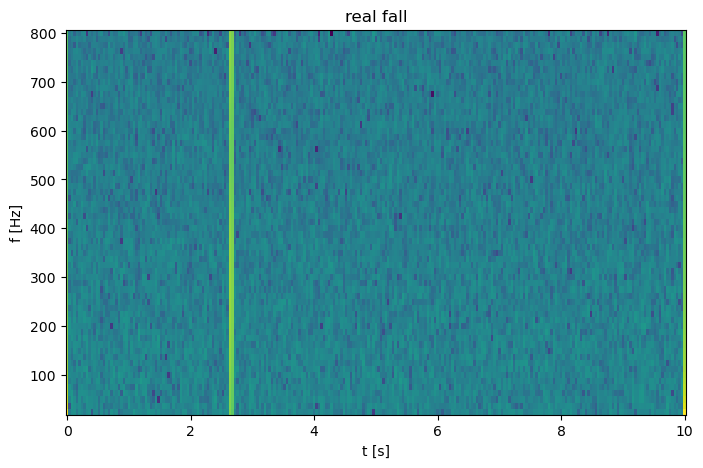

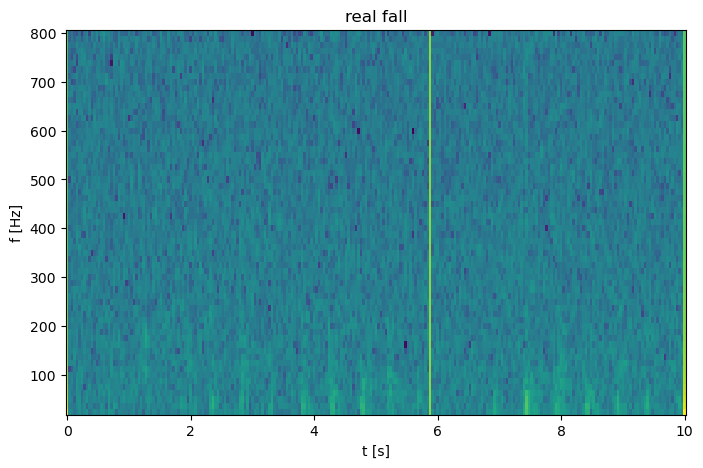

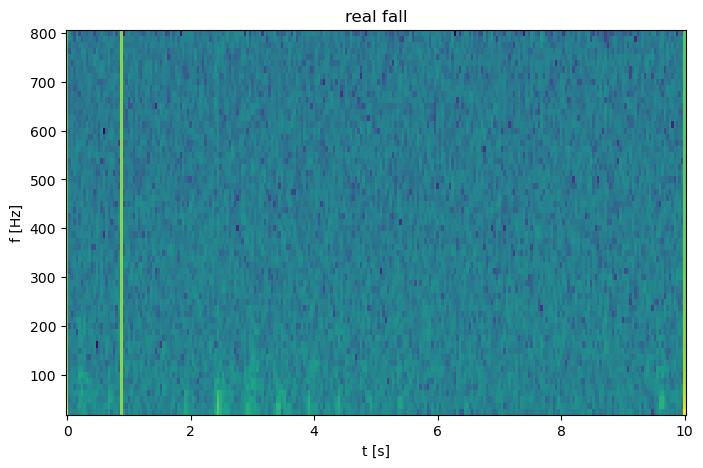

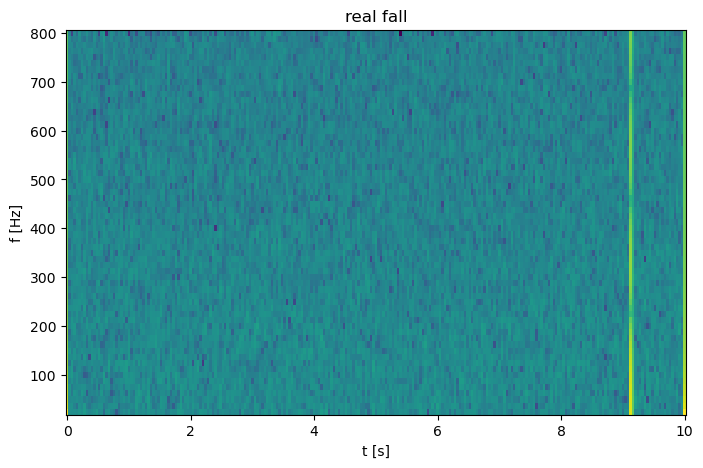

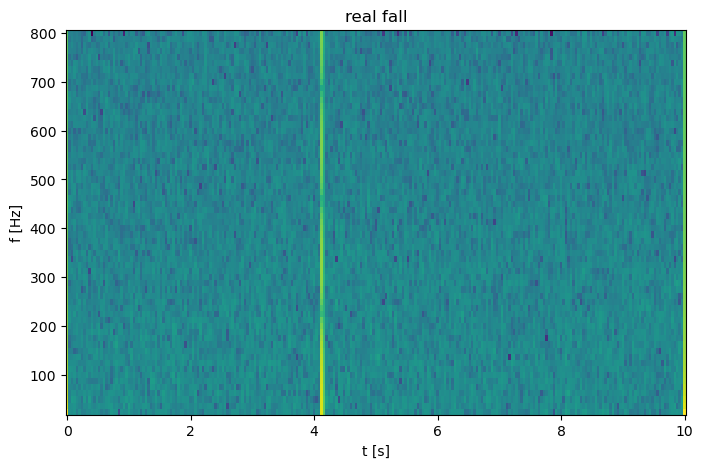

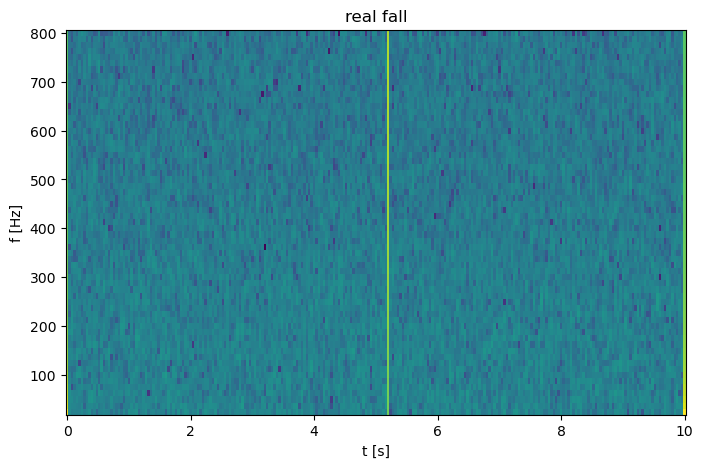

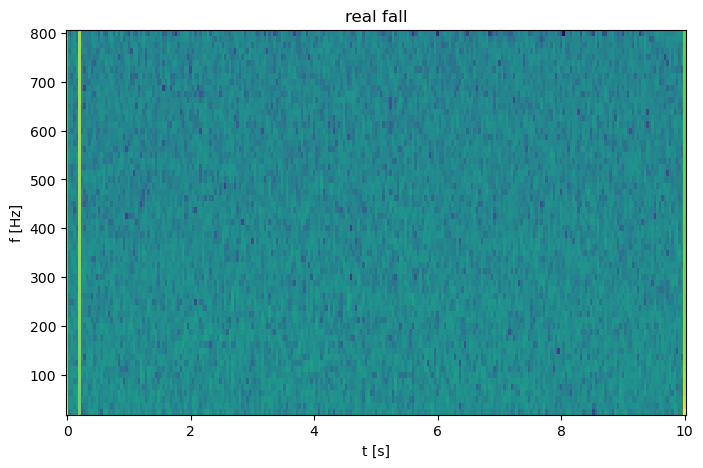

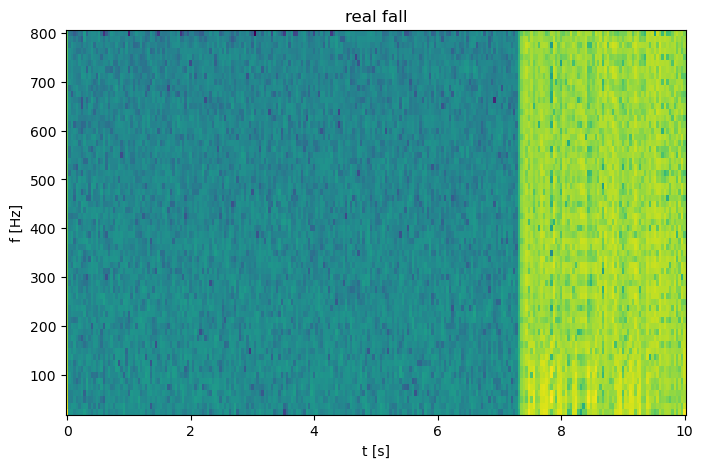

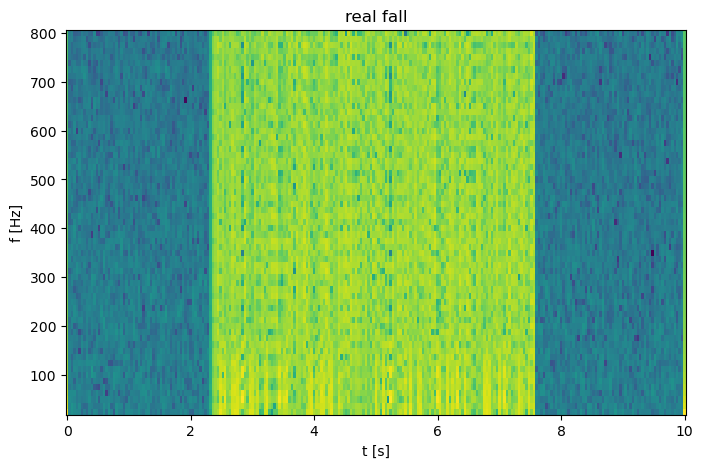

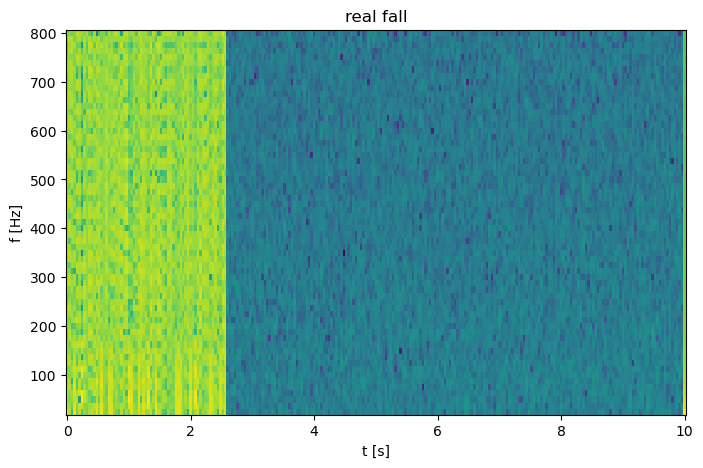

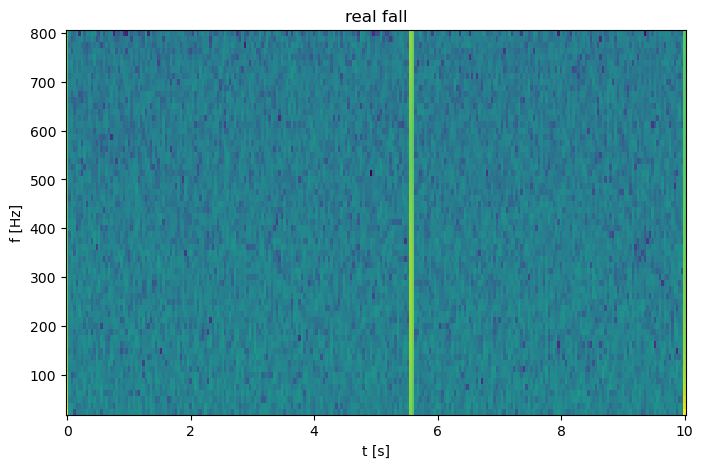

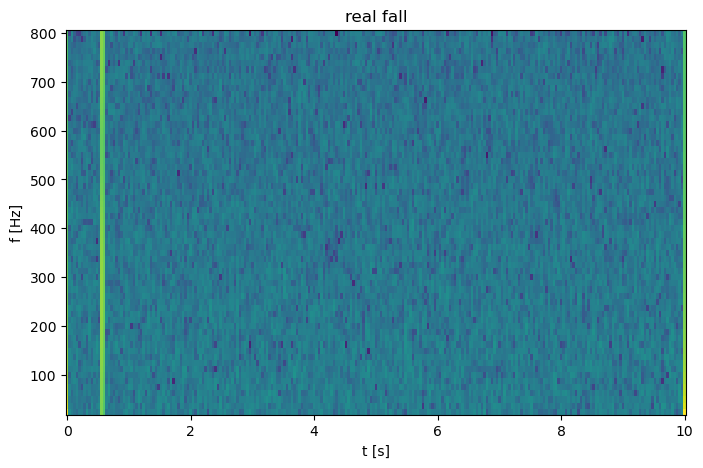

In [112]:
for i, event in enumerate(Real_Events):
    if ((df_segmented_real['predicted'].iloc[i]) == 1):
            data_preparation.stft_plot(label = "real fall" , data = df_segmented_real['z'].iloc[i])
    else:
        continue
    